In [47]:
import pandas as pd

file = input("Enter the name of the csv file: ")
csvfile = file + '.csv'
health_data = pd.read_csv(csvfile, index_col = 'Towncode', parse_dates = True)
health_data

Enter the name of the csv file: HealthData


C:\Users\dwara\AppData\Local\Temp\ipykernel_12152\4030947604.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  health_data = pd.read_csv(csvfile, index_col = 'Towncode', parse_dates = True)


,Date,Cases
Towncode,,
EA,2022-01-01,100
EA,2022-01-08,98
EA,2022-01-15,96
EA,2022-01-22,97
EA,2022-01-29,98
...,...,...
SO,2022-06-04,20
SO,2022-06-11,18
SO,2022-06-18,16


In [48]:
file1 = input("Enter the name of the csv file: ")
csvfile1 = file1 + '.csv'
population_data = pd.read_csv(csvfile1, index_col = 'Towncode')
population_data

Enter the name of the csv file: PopulationData


,Townname,Population
Towncode,,
EA,Eastville,10000
WE,Weston,5000
NO,Northdale,7500
SO,Southberg,2500


In [49]:
df = health_data.join(population_data)
df

,Date,Cases,Townname,Population
Towncode,,,,
EA,2022-01-01,100,Eastville,10000
EA,2022-01-08,98,Eastville,10000
EA,2022-01-15,96,Eastville,10000
EA,2022-01-22,97,Eastville,10000
EA,2022-01-29,98,Eastville,10000
...,...,...,...,...
WE,2022-06-04,130,Weston,5000
WE,2022-06-11,139,Weston,5000
WE,2022-06-18,143,Weston,5000


In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

Towncode
EA   2022-01-01
EA   2022-01-08
EA   2022-01-15
EA   2022-01-22
EA   2022-01-29
        ...    
WE   2022-06-04
WE   2022-06-11
WE   2022-06-18
WE   2022-06-25
WE   2022-07-02
Name: Date, Length: 108, dtype: datetime64[ns]

#Make a line graph that contains all cities and displays infections over time

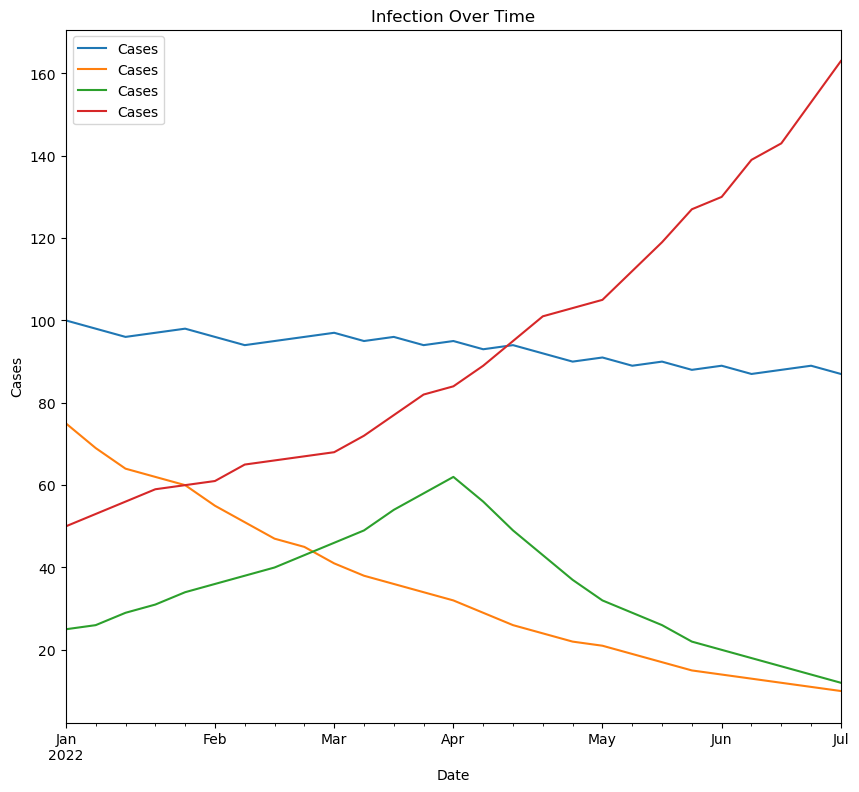

In [68]:
import matplotlib.pyplot as plt

df.groupby('Towncode').plot(x = 'Date', y = 'Cases', ax = plt.gca(), legend = True, figsize = (10,9))
plt.title("Infection Over Time")
plt.ylabel('Cases')
plt.show()

#Make a line chart that displays each city’s infections over time as a percentage of the city’s population

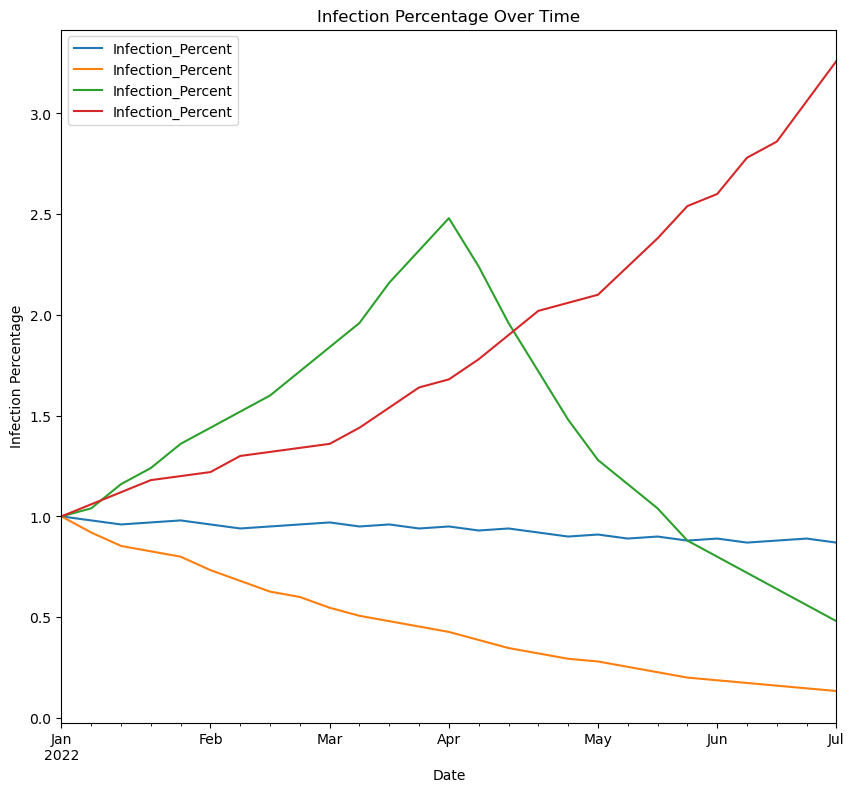

In [69]:
df['Infection_Percent'] = (df['Cases']/df['Population'])*100
df.groupby('Towncode').plot(x = 'Date', y = 'Infection_Percent', ax = plt.gca(), legend = True, figsize = (10,9))
plt.ylabel('Infection Percentage')
plt.title('Infection Percentage Over Time')
plt.show()

#Make a stacked bar chart that displays the overall infection count in each month.

In [53]:
health_data['Date'] = pd.to_datetime(health_data['Date'])
health_data['Date']

Towncode
EA   2022-01-01
EA   2022-01-08
EA   2022-01-15
EA   2022-01-22
EA   2022-01-29
        ...    
SO   2022-06-04
SO   2022-06-11
SO   2022-06-18
SO   2022-06-25
SO   2022-07-02
Name: Date, Length: 108, dtype: datetime64[ns]

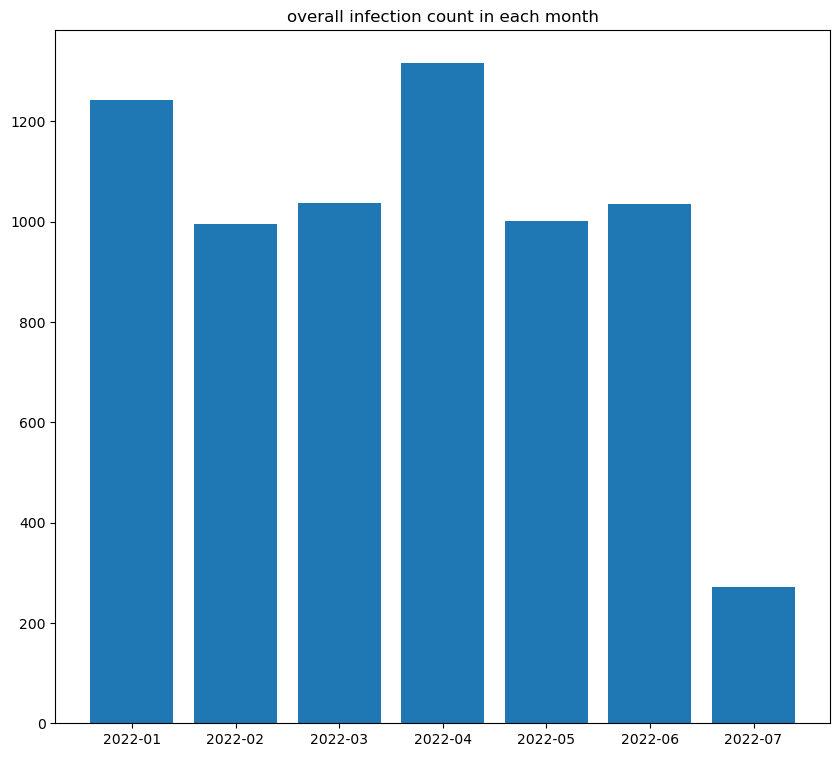

In [67]:
health_data['Month'] = health_data['Date'].dt.to_period('M')
infection = health_data.groupby('Month')['Cases'].sum()

plt.figure(figsize = (10,9))
plt.bar(infection.index.astype(str), infection)
plt.title('overall infection count in each month')
plt.show()